<a href="https://colab.research.google.com/github/BrnCode/Olist/blob/main/Agraria_Sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np

import seaborn as sns  
import matplotlib.pyplot as plt 

from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
df = pd.read_excel('/content/Dados prontos.xlsx')
df.head()

Data  Preço Soja  Farelo de Soja  Óleo de Palma  VIX Index      DXY  \
0 2022-11-04     1463.50           420.2      900.18744      25.02  111.199   
1 2022-11-03     1437.00           414.3      896.44415      25.30  112.930   
2 2022-11-02     1454.00           424.5      912.54431      25.86  111.345   
3 2022-11-01     1447.75           424.8      881.15405      25.81  111.481   
4 2022-10-31     1407.00           428.1      816.00708      25.88  111.527   

     WTI  Brent     BDI  USDBRL  
0  91.84  97.97     NaN  5.0346  
1  88.17  94.67  1290.0  5.1164  
2  90.00  96.16  1321.0  5.1468  
3  88.37  94.65  1377.0  5.1797  
4  86.53  94.83  1463.0  5.2954

In [55]:
df.dtypes

Data              datetime64[ns]
Preço Soja               float64
Farelo de Soja           float64
Óleo de Palma            float64
VIX Index                float64
DXY                      float64
WTI                      float64
Brent                    float64
BDI                      float64
USDBRL                   float64
dtype: object

In [56]:
df.shape

(2503, 10)

In [57]:
df.isna().sum()

Data              0
Preço Soja        6
Farelo de Soja    6
Óleo de Palma     0
VIX Index         0
DXY               0
WTI               0
Brent             0
BDI               1
USDBRL            0
dtype: int64

In [58]:
df[['Preço Soja', 'Farelo de Soja', 'BDI']] = df[['Preço Soja', 'Farelo de Soja', 'BDI']].interpolate(method ='linear', limit_direction ='forward')
df[['Preço Soja', 'Farelo de Soja', 'BDI']] = df[['Preço Soja', 'Farelo de Soja', 'BDI']].interpolate(method ='linear', limit_direction ='backward', limit = 1)
df.isna().sum()

Data              0
Preço Soja        0
Farelo de Soja    0
Óleo de Palma     0
VIX Index         0
DXY               0
WTI               0
Brent             0
BDI               0
USDBRL            0
dtype: int64

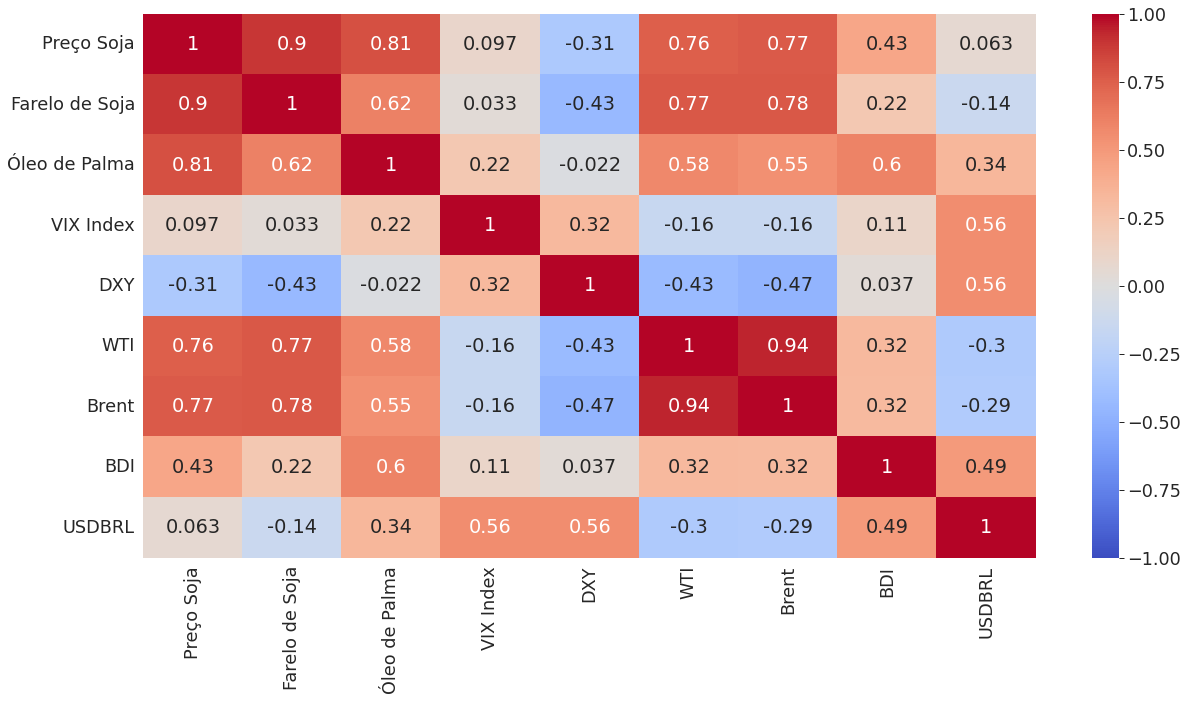

In [59]:
ax, fig =plt.subplots(figsize=(20,10))
# sns.heatmap(retorno.corr(), annot=True);
#upp_mat = np.triu(retorno.corr())
sns.heatmap(df[['Preço Soja', 'Farelo de Soja', 'Óleo de Palma', 'VIX Index',
       'DXY', 'WTI', 'Brent', 'BDI', 'USDBRL']].corr(), annot=True, vmax=1, vmin=-1, cmap='coolwarm');

In [60]:
ax, fig =plt.subplots(figsize=(20,10))
# sns.heatmap(retorno.corr(), annot=True);
#upp_mat = np.triu(retorno.corr())
sns.heatmap(df[['Preço Soja', 'Farelo de Soja', 'Óleo de Palma', 'VIX Index',
       'DXY', 'WTI', 'Brent', 'BDI', 'USDBRL']].corr(method='spearman'), annot=True, vmax=1, vmin=-1, cmap='coolwarm');

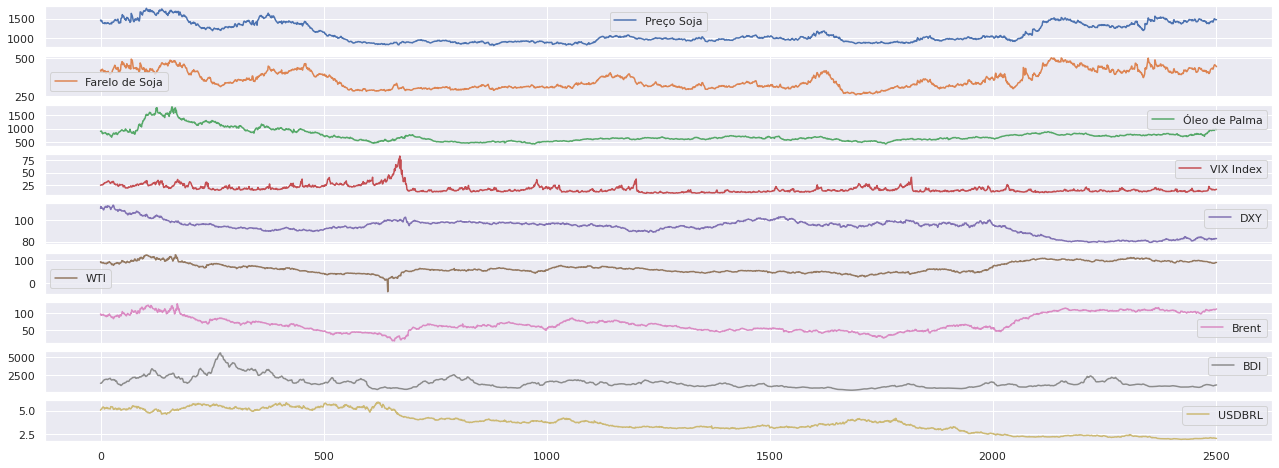

In [61]:
sns.set()
df[['Preço Soja', 'Farelo de Soja', 'Óleo de Palma', 'VIX Index',
       'DXY', 'WTI', 'Brent', 'BDI', 'USDBRL']].plot(subplots=True, figsize=(22,8));

In [62]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [63]:
fig = px.line(df, x='Data', y=['Preço Soja', 'Farelo de Soja', 'Óleo de Palma', 'VIX Index',
       'DXY', 'WTI', 'Brent', 'BDI', 'USDBRL'])
fig.show()

In [64]:
df.columns

Index(['Data', 'Preço Soja', 'Farelo de Soja', 'Óleo de Palma', 'VIX Index',
       'DXY', 'WTI', 'Brent', 'BDI', 'USDBRL'],
      dtype='object')

In [65]:
decomposicaoPreco = seasonal_decompose(df[['Preço Soja']], model='additive', period=30, extrapolate_trend=30)  
decomposicaoFarelo = seasonal_decompose(df[['Farelo de Soja']], model='additive', period=30, extrapolate_trend=30)  
decomposicaoPalma = seasonal_decompose(df[['Óleo de Palma']], model='additive', period=30, extrapolate_trend=30)  
decomposicaoVIX = seasonal_decompose(df[['VIX Index']], model='additive', period=30, extrapolate_trend=30)  
decomposicaoDXY = seasonal_decompose(df[['DXY']], model='additive', period=30, extrapolate_trend=30)  
decomposicaoWTI = seasonal_decompose(df[['WTI']], model='additive', period=30, extrapolate_trend=30)  
decomposicaoBrent = seasonal_decompose(df[['Brent']], model='additive', period=30, extrapolate_trend=30)  
decomposicaoBDI = seasonal_decompose(df[['BDI']], model='additive', period=30, extrapolate_trend=30)  
decomposicaoUSDBRL = seasonal_decompose(df[['USDBRL']], model='additive', period=30, extrapolate_trend=30)  

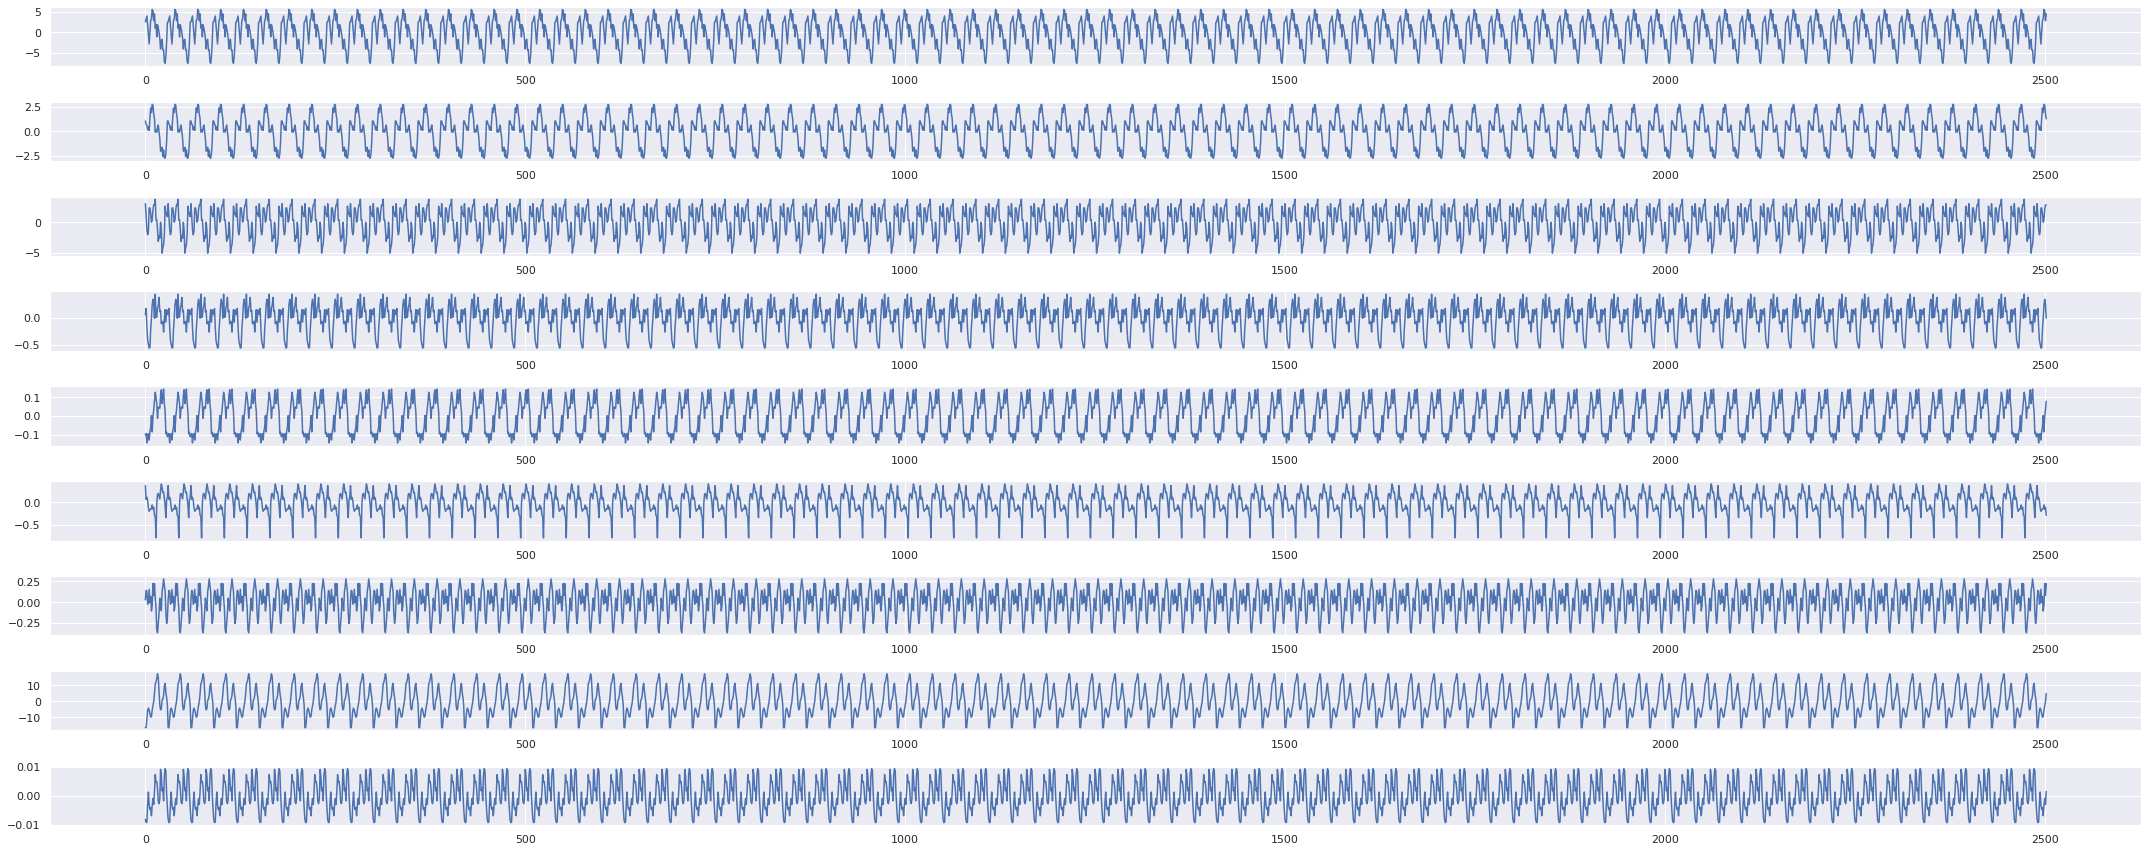

In [66]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9,1, figsize=(30,12))
decomposicaoPreco.seasonal.plot(ax=ax1)  
decomposicaoFarelo.seasonal.plot(ax=ax2)  
decomposicaoPalma.seasonal.plot(ax=ax3)
decomposicaoVIX.seasonal.plot(ax=ax4) 
decomposicaoDXY.seasonal.plot(ax=ax5)
decomposicaoWTI.seasonal.plot(ax=ax6)  
decomposicaoBrent.seasonal.plot(ax=ax7)  
decomposicaoBDI.seasonal.plot(ax=ax8)
decomposicaoUSDBRL.seasonal.plot(ax=ax9)
plt.tight_layout()

Em curto prazo não se tem sinal de pra onde esses indicadores estão indo

In [67]:
decomposicaoPreco = seasonal_decompose(df[['Preço Soja']], model='additive', period=60, extrapolate_trend=60)  
decomposicaoFarelo = seasonal_decompose(df[['Farelo de Soja']], model='additive', period=60, extrapolate_trend=60)  
decomposicaoPalma = seasonal_decompose(df[['Óleo de Palma']], model='additive', period=60, extrapolate_trend=60)  
decomposicaoVIX = seasonal_decompose(df[['VIX Index']], model='additive', period=60, extrapolate_trend=60)  
decomposicaoDXY = seasonal_decompose(df[['DXY']], model='additive', period=60, extrapolate_trend=60)  
decomposicaoWTI = seasonal_decompose(df[['WTI']], model='additive', period=60, extrapolate_trend=60)  
decomposicaoBrent = seasonal_decompose(df[['Brent']], model='additive', period=60, extrapolate_trend=60)  
decomposicaoBDI = seasonal_decompose(df[['BDI']], model='additive', period=60, extrapolate_trend=60)  
decomposicaoUSDBRL = seasonal_decompose(df[['USDBRL']], model='additive', period=60, extrapolate_trend=60)  

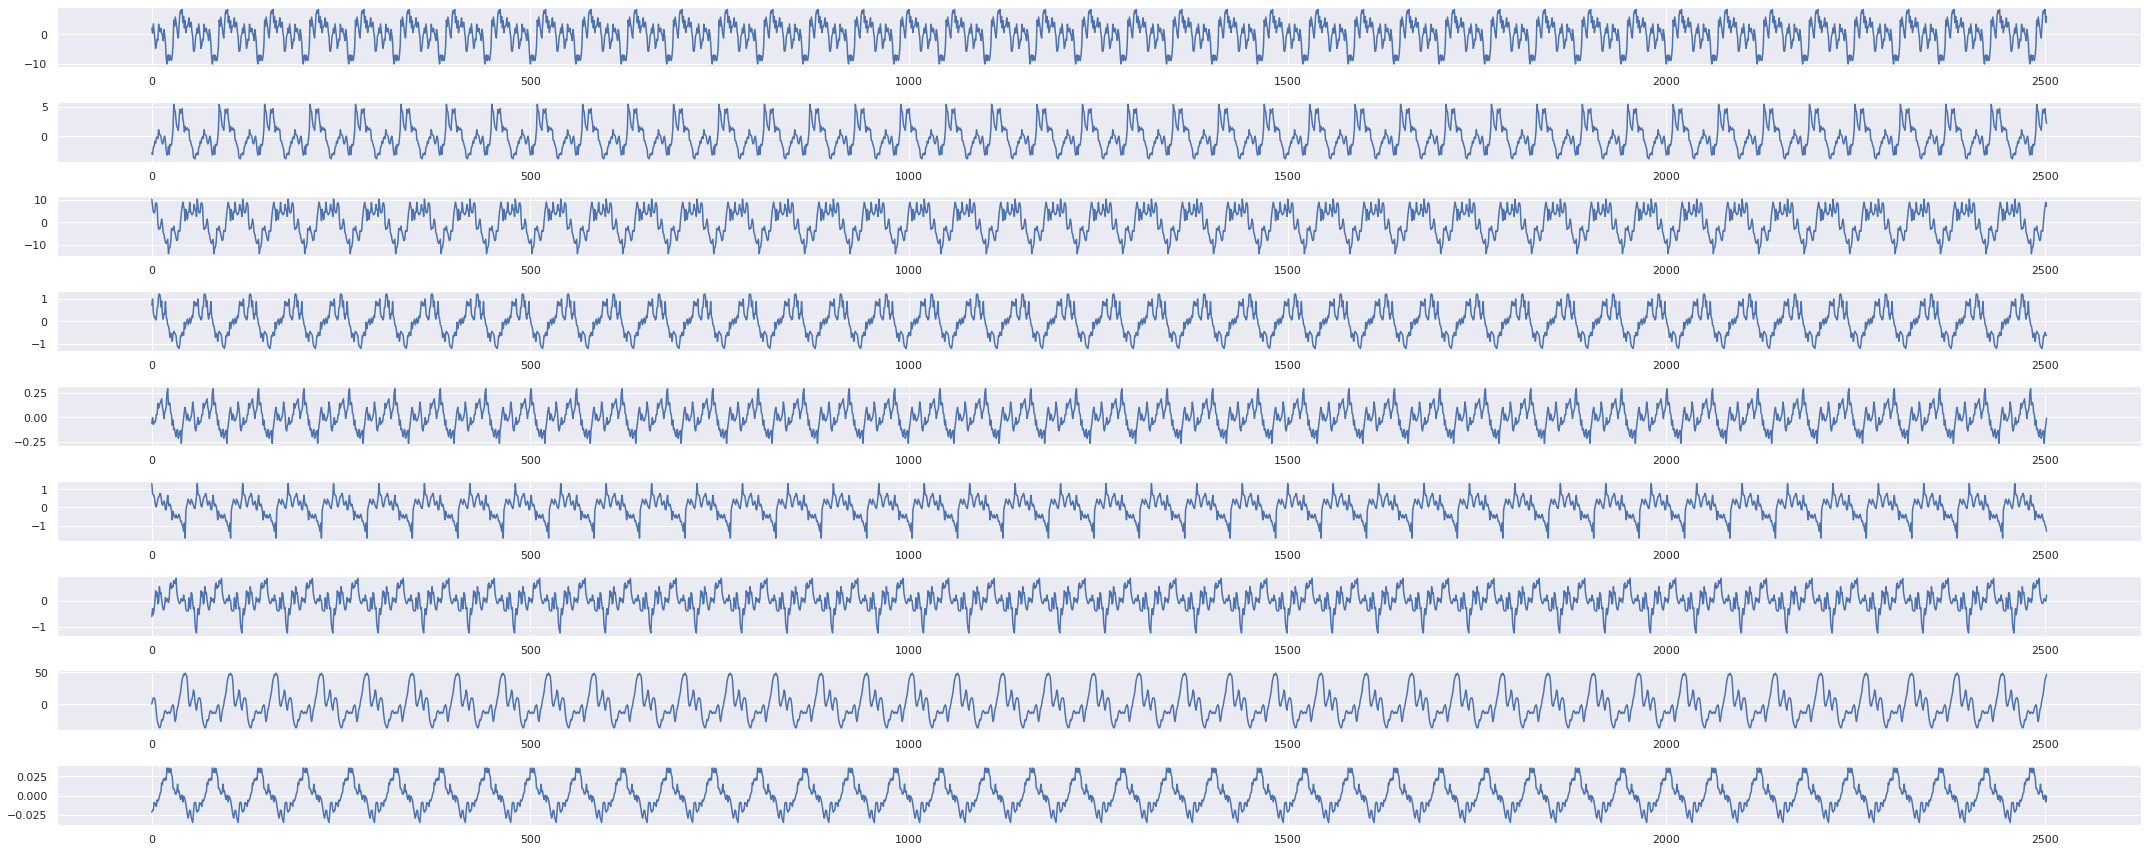

In [68]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9,1, figsize=(30,12))
decomposicaoPreco.seasonal.plot(ax=ax1)  
decomposicaoFarelo.seasonal.plot(ax=ax2)  
decomposicaoPalma.seasonal.plot(ax=ax3)
decomposicaoVIX.seasonal.plot(ax=ax4) 
decomposicaoDXY.seasonal.plot(ax=ax5)
decomposicaoWTI.seasonal.plot(ax=ax6)  
decomposicaoBrent.seasonal.plot(ax=ax7)  
decomposicaoBDI.seasonal.plot(ax=ax8)
decomposicaoUSDBRL.seasonal.plot(ax=ax9)
plt.tight_layout()

In [69]:
decomposicaoPreco = seasonal_decompose(df[['Preço Soja']], model='additive', period=80, extrapolate_trend=80)  
decomposicaoFarelo = seasonal_decompose(df[['Farelo de Soja']], model='additive', period=80, extrapolate_trend=80)  
decomposicaoPalma = seasonal_decompose(df[['Óleo de Palma']], model='additive', period=80, extrapolate_trend=80)  
decomposicaoVIX = seasonal_decompose(df[['VIX Index']], model='additive', period=80, extrapolate_trend=80)  
decomposicaoDXY = seasonal_decompose(df[['DXY']], model='additive', period=80, extrapolate_trend=80)  
decomposicaoWTI = seasonal_decompose(df[['WTI']], model='additive', period=80, extrapolate_trend=80)  
decomposicaoBrent = seasonal_decompose(df[['Brent']], model='additive', period=80, extrapolate_trend=80)  
decomposicaoBDI = seasonal_decompose(df[['BDI']], model='additive', period=80, extrapolate_trend=80)  
decomposicaoUSDBRL = seasonal_decompose(df[['USDBRL']], model='additive', period=80, extrapolate_trend=80)  

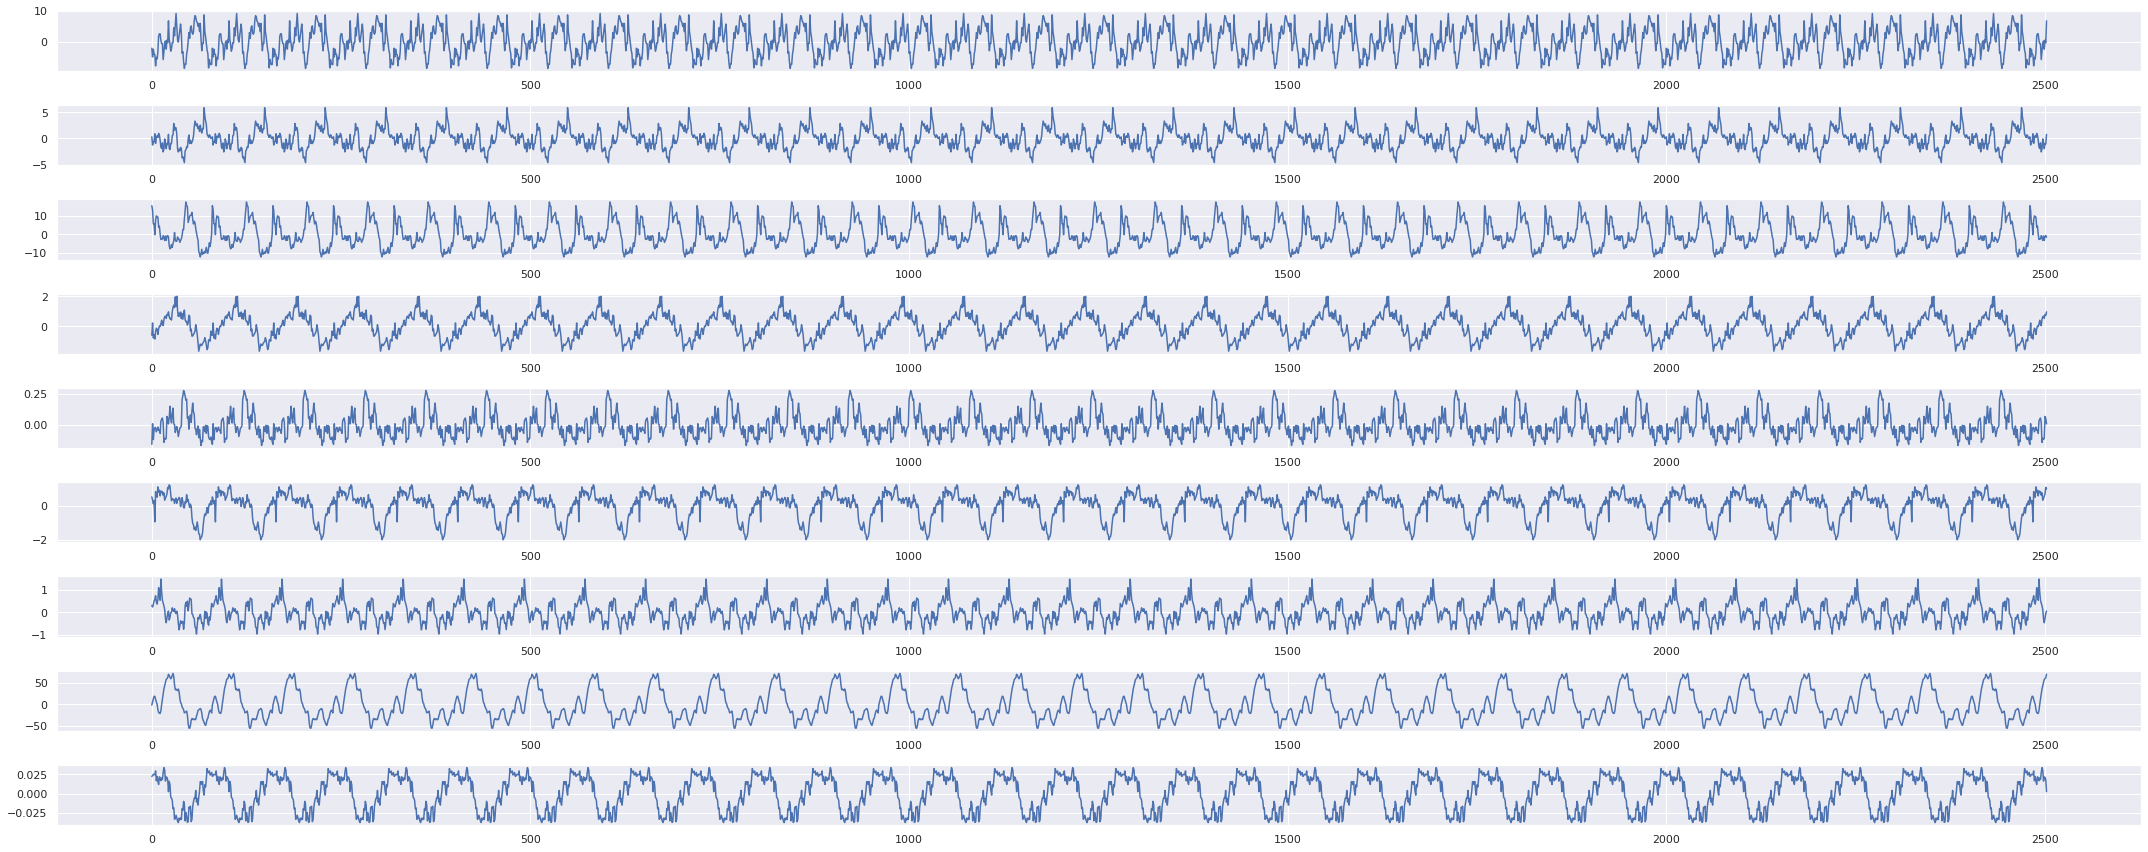

In [70]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9,1, figsize=(30,12))
decomposicaoPreco.seasonal.plot(ax=ax1)  
decomposicaoFarelo.seasonal.plot(ax=ax2)  
decomposicaoPalma.seasonal.plot(ax=ax3)
decomposicaoVIX.seasonal.plot(ax=ax4) 
decomposicaoDXY.seasonal.plot(ax=ax5)
decomposicaoWTI.seasonal.plot(ax=ax6)  
decomposicaoBrent.seasonal.plot(ax=ax7)  
decomposicaoBDI.seasonal.plot(ax=ax8)
decomposicaoUSDBRL.seasonal.plot(ax=ax9)
plt.tight_layout()

In [71]:
decomposicaoPreco = seasonal_decompose(df[['Preço Soja']], model='additive', period=90, extrapolate_trend=90)  
decomposicaoFarelo = seasonal_decompose(df[['Farelo de Soja']], model='additive', period=90, extrapolate_trend=90)  
decomposicaoPalma = seasonal_decompose(df[['Óleo de Palma']], model='additive', period=90, extrapolate_trend=90)  
decomposicaoVIX = seasonal_decompose(df[['VIX Index']], model='additive', period=90, extrapolate_trend=90)  
decomposicaoDXY = seasonal_decompose(df[['DXY']], model='additive', period=90, extrapolate_trend=90)  
decomposicaoWTI = seasonal_decompose(df[['WTI']], model='additive', period=90, extrapolate_trend=90)  
decomposicaoBrent = seasonal_decompose(df[['Brent']], model='additive', period=90, extrapolate_trend=90)  
decomposicaoBDI = seasonal_decompose(df[['BDI']], model='additive', period=90, extrapolate_trend=90)  
decomposicaoUSDBRL = seasonal_decompose(df[['USDBRL']], model='additive', period=90, extrapolate_trend=90)  

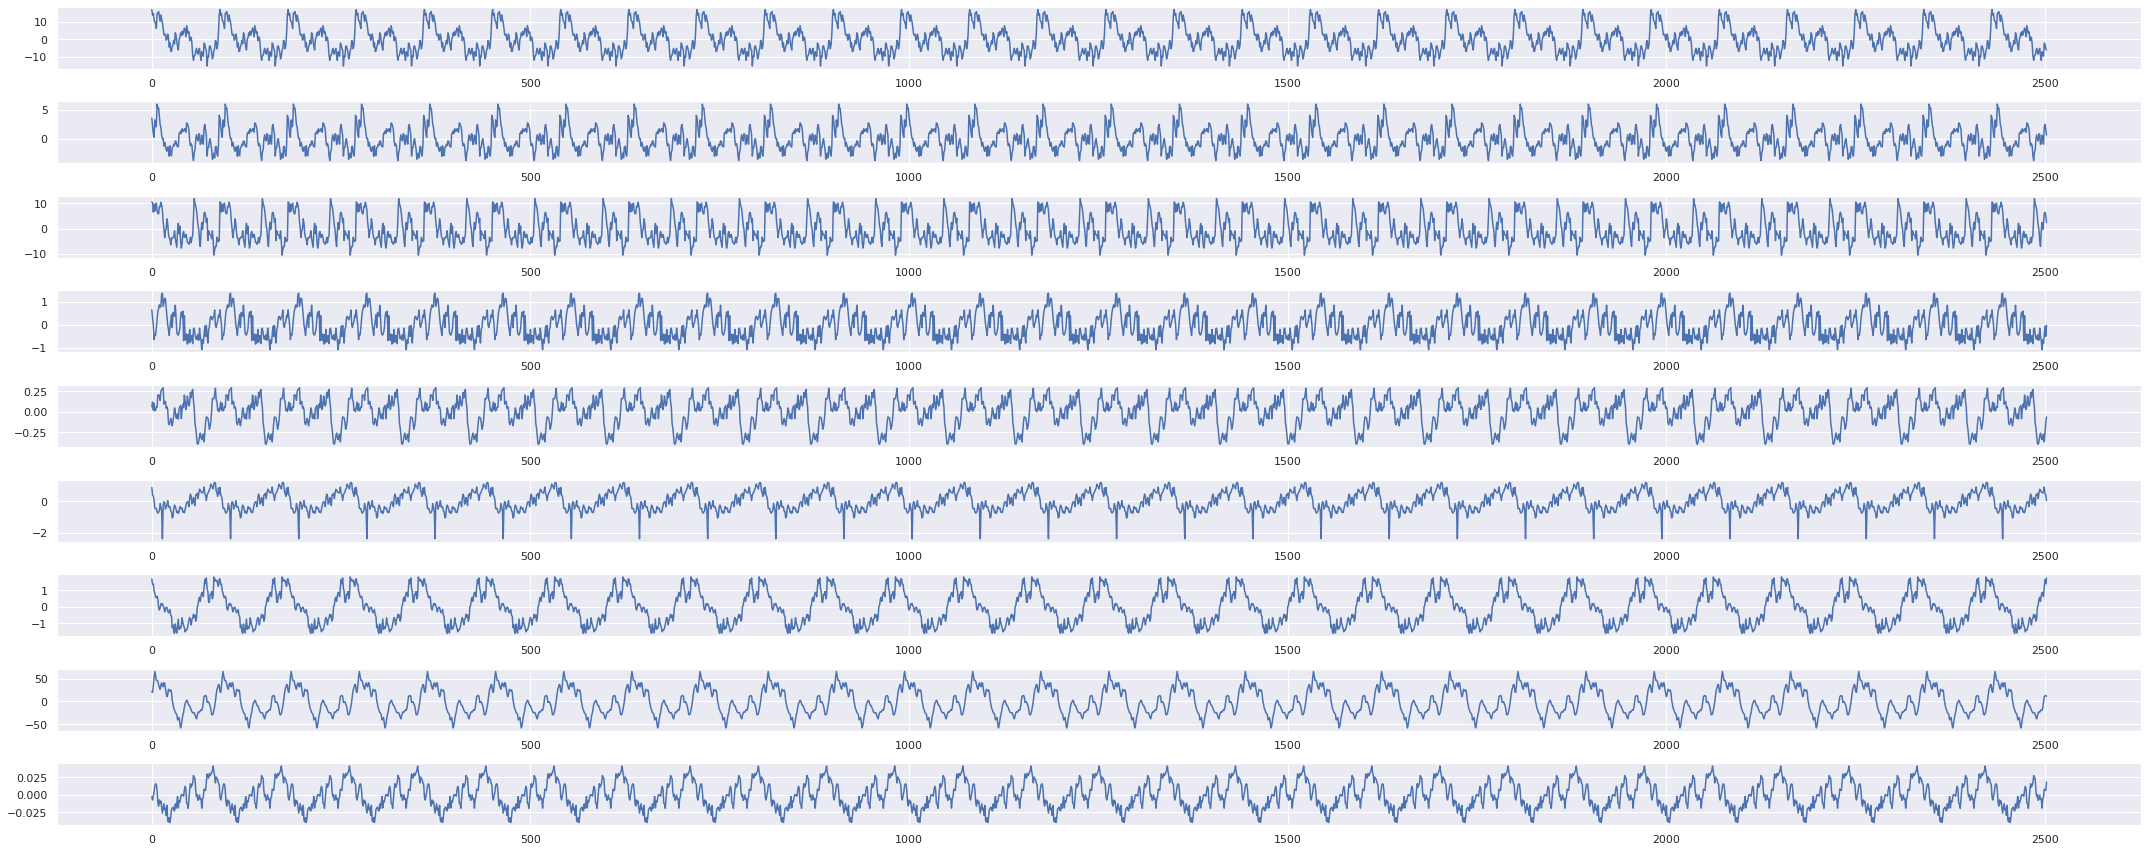

In [72]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9,1, figsize=(30,12))
decomposicaoPreco.seasonal.plot(ax=ax1)  
decomposicaoFarelo.seasonal.plot(ax=ax2)  
decomposicaoPalma.seasonal.plot(ax=ax3)
decomposicaoVIX.seasonal.plot(ax=ax4) 
decomposicaoDXY.seasonal.plot(ax=ax5)
decomposicaoWTI.seasonal.plot(ax=ax6)  
decomposicaoBrent.seasonal.plot(ax=ax7)  
decomposicaoBDI.seasonal.plot(ax=ax8)
decomposicaoUSDBRL.seasonal.plot(ax=ax9)
plt.tight_layout()

quarto grafico de baixo pra cima tem crescente e tem um vale bem grande. Analisando ele, vesse que esse indicador tem uma tendencia de alta pela sazonalidade e esse periodo entre uma baixa e uma alta, dura 90 dias.


In [73]:
decomposicaoPreco = seasonal_decompose(df[['Preço Soja']], model='additive', period=365, extrapolate_trend=365)  
decomposicaoFarelo = seasonal_decompose(df[['Farelo de Soja']], model='additive', period=365, extrapolate_trend=365)  
decomposicaoPalma = seasonal_decompose(df[['Óleo de Palma']], model='additive', period=365, extrapolate_trend=365)  
decomposicaoVIX = seasonal_decompose(df[['VIX Index']], model='additive', period=365, extrapolate_trend=365)  
decomposicaoDXY = seasonal_decompose(df[['DXY']], model='additive', period=365, extrapolate_trend=365)  
decomposicaoWTI = seasonal_decompose(df[['WTI']], model='additive', period=365, extrapolate_trend=365)  
decomposicaoBrent = seasonal_decompose(df[['Brent']], model='additive', period=365, extrapolate_trend=365)  
decomposicaoBDI = seasonal_decompose(df[['BDI']], model='additive', period=365, extrapolate_trend=365)  
decomposicaoUSDBRL = seasonal_decompose(df[['USDBRL']], model='additive', period=365, extrapolate_trend=365)  

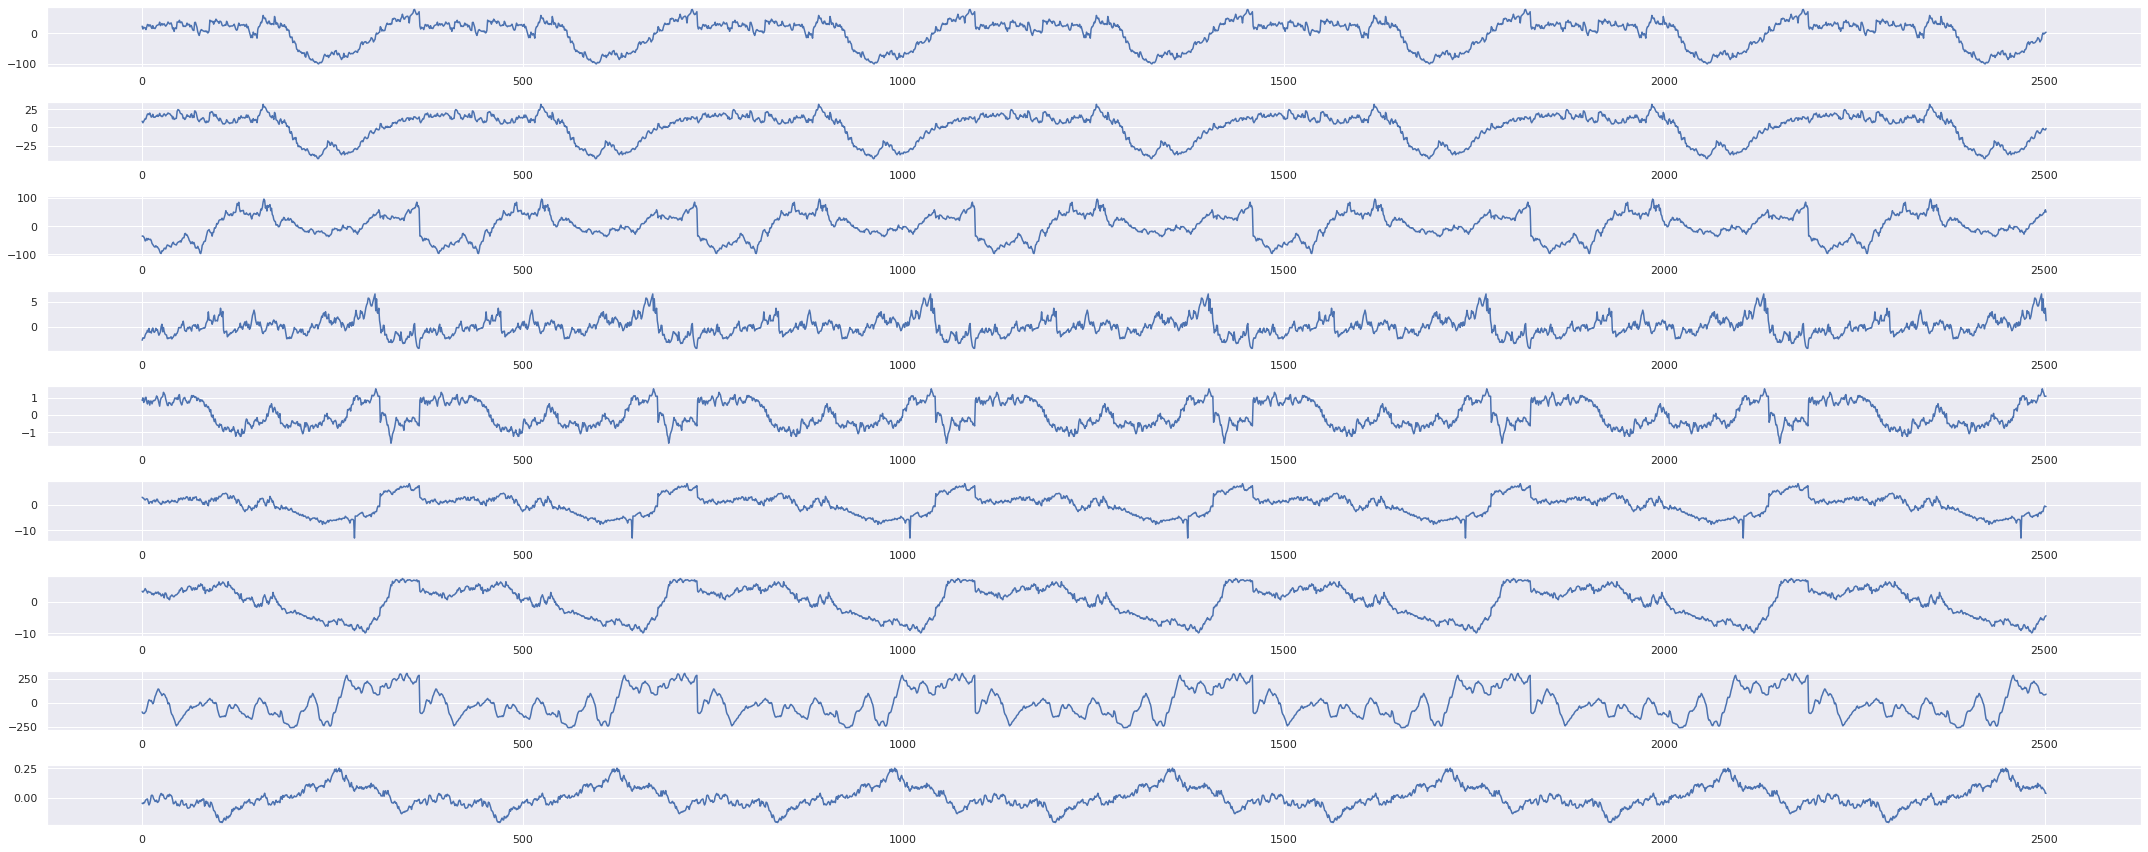

In [74]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9,1, figsize=(30,12))
decomposicaoPreco.seasonal.plot(ax=ax1)  
decomposicaoFarelo.seasonal.plot(ax=ax2)  
decomposicaoPalma.seasonal.plot(ax=ax3)
decomposicaoVIX.seasonal.plot(ax=ax4) 
decomposicaoDXY.seasonal.plot(ax=ax5)
decomposicaoWTI.seasonal.plot(ax=ax6)  
decomposicaoBrent.seasonal.plot(ax=ax7)  
decomposicaoBDI.seasonal.plot(ax=ax8)
decomposicaoUSDBRL.seasonal.plot(ax=ax9)
plt.tight_layout()

Ulimo grafico, no periodo de um ano uma tendencia de crescimento dada a sazonalidade. 

In [75]:
decomposicaoPreco1 = seasonal_decompose(df[['Preço Soja']], model='additive', period=30, extrapolate_trend=30)
decomposicaoPreco2 = seasonal_decompose(df[['Preço Soja']], model='additive', period=90, extrapolate_trend=90)
decomposicaoPreco3 = seasonal_decompose(df[['Preço Soja']], model='additive', period=365, extrapolate_trend=365)

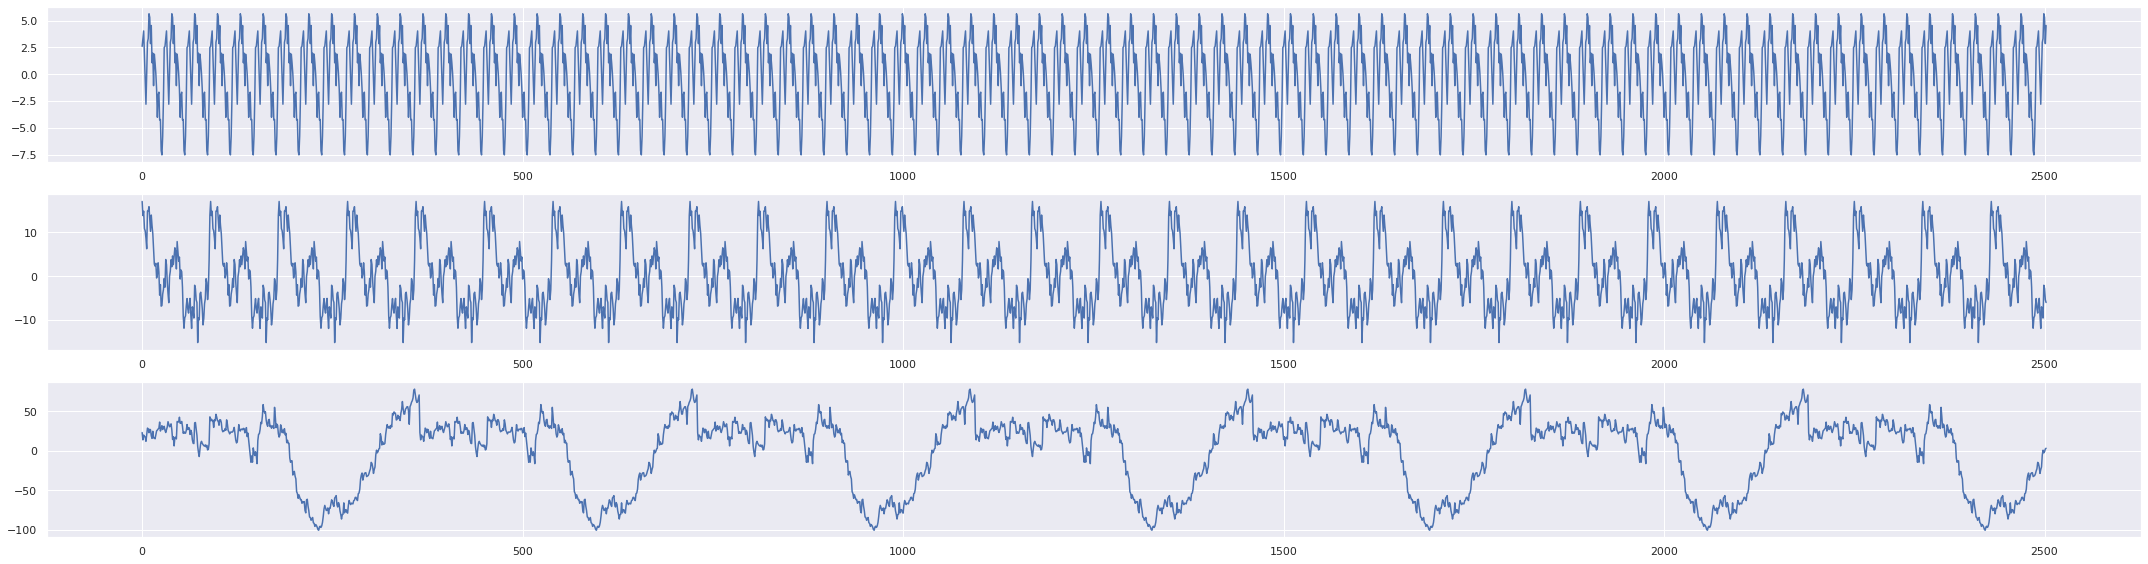

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(30,8))
decomposicaoPreco1.seasonal.plot(ax=ax1)  
decomposicaoPreco2.seasonal.plot(ax=ax2)
decomposicaoPreco3.seasonal.plot(ax=ax3)
plt.tight_layout()

In [47]:
sns.pairplot(df[['Preço Soja', 'Farelo de Soja', 'Óleo de Palma', 'VIX Index',
       'DXY', 'WTI', 'Brent', 'BDI', 'USDBRL']]);

Analise de distribuição

In [48]:
sns.set(color_codes=True)
sns.set_context("paper",font_scale=2)
sns.set_style("white")
df['Preço Soja'].plot(figsize=(20,8));

In [49]:
decomposicaoPreco.seasonal

0       22.946622
1       13.734731
2       19.760756
3       17.865743
4       17.366083
          ...    
2498     0.659691
2499    -2.638419
2500    -0.998074
2501     2.109884
2502     3.129094
Name: seasonal, Length: 2503, dtype: float64

In [50]:
subtração = (df['Preço Soja'] - (decomposicaoPreco.seasonal))
sns.set(color_codes=True)
sns.set_context("paper",font_scale=2)
sns.set_style("white")
subtração.plot(figsize=(20,8));

In [51]:
df1 = df['Preço Soja'].pct_change(1)*100
sns.set(color_codes=True)
sns.set_context("paper",font_scale=2)
sns.set_style("white")
df1.plot(figsize=(20,8));

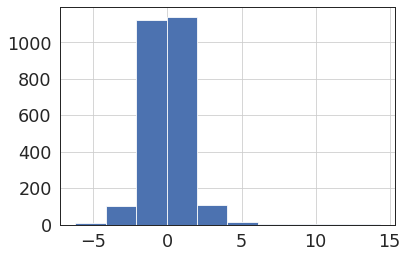

In [52]:
df1.hist();